<a href="https://colab.research.google.com/github/mohanashwin999/CIFAR-10-classification/blob/main/CIFAR_10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Dataset

In [ ]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train_true = x_train
y_train_true = y_train
x_test_true = x_test
y_test_true = y_test

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

170500096/170498071 [==============================] - 2s 0us/step


## The dataset consists 50000 images and 10 classes. The images are of 32 X 32 size and consists of 3 channels (RGB)

In [ ]:
x_train_true.shape

(50000, 32, 32, 3)

In [ ]:
y_train_true.shape

(50000, 1)

## The classes of the dataset

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Function to show images

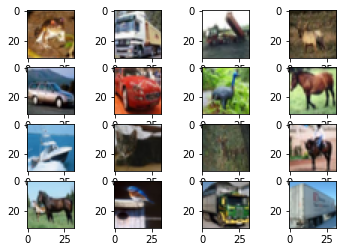

In [ ]:
from matplotlib import pyplot
from keras.datasets import cifar10
def show_imgs(X):
    pyplot.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            pyplot.subplot2grid((4,4),(i,j))
            pyplot.imshow(X[k])
            k = k+1
    # show the plot
    pyplot.show()
show_imgs(x_train_true[:16])

## Normalization by z-score and  to categorical converts integer values to binary matrix

In [ ]:
def preprocessing(x, y):
  mean = np.mean(x, axis=(0,1,2,3))
  std = np.std(x, axis=(0,1,2,3))
  x = (x - mean)/(std + 1e-7)

  y = np_utils.to_categorical(y, 10)            #10 classes

  return x, y

## Function to evaluate the model

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
def model_evaluation(y_test, y_pred):
  cm = confusion_matrix(y_test1, y_pred)
  print(cm)
  prf = precision_recall_fscore_support(y_test, y_pred)
  precision = list(prf[0])
  recall = list(prf[1])
  f_score = list(prf[2])
  support = list(prf[3]) 
  
  print("Accuracy:", accuracy_score(y_true = y_test, y_pred = y_pred))
  print("Precision:", precision)
  print("Recall:", recall)
  print("F-score:", f_score)
  print("Support:", support)


##Model 1: CNN
A convolution extracts tiles of the input feature map, and applies filters to them to compute new features, producing an output feature map, or convolved feature (which may have a different size and depth than the input feature map). Convolutions are defined by two parameters:

Size of the tiles that are extracted (typically 3x3 or 5x5 pixels).
The depth of the output feature map, which corresponds to the number of filters that are applied.
During a convolution, the filters (matrices the same size as the tile size) effectively slide over the input feature map's grid horizontally and vertically, one pixel at a time, extracting each corresponding tile.
<img src = "https://developers.google.com/machine-learning/practica/image-classification/images/convolution_overview.gif">

A 5x5 feature map and a 3x3 convolution Figure 4a. Left: A 5x5 input feature map (depth 1). Right: a 3x3 convolution (depth 1).


The output feature map (3x3) is smaller than the input feature map (5x5). If you instead want the output feature map to have the same dimensions as the input feature map, you can add padding (blank rows/columns with all-zero values) to each side of the input feature map, producing a 7x7 matrix with 5x5 possible locations to extract a 3x3 tile.

For each filter-tile pair, the CNN performs element-wise multiplication of the filter matrix and the tile matrix, and then sums all the elements of the resulting matrix to get a single value. Each of these resulting values for every filter-tile pair is then output in the convolved feature matrix (see Figures 4a and 4b).


During training, the CNN "learns" the optimal values for the filter matrices that enable it to extract meaningful features (textures, edges, shapes) from the input feature map. As the number of filters (output feature map depth) applied to the input increases, so does the number of features the CNN can extract. However, the tradeoff is that filters compose the majority of resources expended by the CNN, so training time also increases as more filters are added. Additionally, each filter added to the network provides less incremental value than the previous one, so engineers aim to construct networks that use the minimum number of filters needed to extract the features necessary for accurate image classification.

>Following each convolution operation, the CNN applies a Rectified Linear Unit (ReLU) transformation to the convolved feature, in order to introduce nonlinearity into the model. The ReLU function, f(x) = max(x), returns x for all values of x > 0, and returns 0 for all values of x ≤ 0.

> After ReLU comes a pooling step, in which the CNN downsamples the convolved feature (to save on processing time), reducing the number of dimensions of the feature map, while still preserving the most critical feature information. A common algorithm used for this process is called max pooling.
Max pooling operates in a similar fashion to convolution. We slide over the feature map and extract tiles of a specified size.
<img src="https://developers.google.com/machine-learning/practica/image-classification/images/maxpool_animation.gif">


> Dropout is a technique for addressing this problem. The key idea is to randomly drop units (along with their connections) from the neural network during training. The reduction in number of parameters in each step of training has effect of regularization. Dropout has shown improvements in the performance of neural networks on supervised learning tasks in vision, speech recognition, classification and computational biology, obtaining state-of-the-art results on many benchmark data sets.



>Kernel_regularizer  allows to apply penalties on layer parameters during optimization. These penalties are incorporated in the loss function that the network optimizes. This argument in convolutional layer  is nothing but L2 regularisation of the weights. This penalizes peaky weights and makes sure that all the inputs are considered. During gradient descent parameter update, the above L2 regularization ultimately means that every weight is decayed linearly, that’s why called weight decay.



>BatchNormalization normalizes the activation of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. It addresses the problem of internal covariate shift. It also acts as a regularizer, in some cases eliminating the need for Dropout. Batch Normalization achieves the same accuracy with fewer training steps thus speeding up the training process.


In [ ]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
 
 
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
 
model.summary() 
 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

## Pre-processing

In [ ]:
x_train, y_train = preprocessing(x_train, y_train)
x_test, y_test = preprocessing(x_test, y_test)

##Training the model

In [ ]:
#training
opt_rms = keras.optimizers.RMSprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 30, batch_size=64, steps_per_epoch=500, validation_data=(x_test, y_test))

Epoch 1/30
500/500 [==============================] - 6s 12ms/step - loss: 1.9483 - accuracy: 0.4305 - val_loss: 1.3027 - val_accuracy: 0.5871
Epoch 2/30
500/500 [==============================] - 5s 11ms/step - loss: 1.2240 - accuracy: 0.6111 - val_loss: 1.1339 - val_accuracy: 0.6582
Epoch 3/30
500/500 [==============================] - 5s 11ms/step - loss: 1.0557 - accuracy: 0.6653 - val_loss: 0.9312 - val_accuracy: 0.7060
Epoch 4/30
500/500 [==============================] - 5s 11ms/step - loss: 0.9316 - accuracy: 0.7047 - val_loss: 0.8451 - val_accuracy: 0.7381
Epoch 5/30
500/500 [==============================] - 5s 11ms/step - loss: 0.8519 - accuracy: 0.7347 - val_loss: 0.7985 - val_accuracy: 0.7604
Epoch 6/30
500/500 [==============================] - 5s 11ms/step - loss: 0.8037 - accuracy: 0.7542 - val_loss: 0.7738 - val_accuracy: 0.7669
Epoch 7/30
500/500 [==============================] - 5s 11ms/step - loss: 0.7418 - accuracy: 0.7736 - val_loss: 0.7174 - val_accuracy: 0.7861

## Save model in google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path = F"/content/gdrive/My Drive/DMW Assignment/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
model_json = model.to_json()
with open(path+"cifar10-cnn-model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path+"cifar10-cnn-model.h5")

## Evaluate the CNN model

In [ ]:
from keras.models import model_from_json

json_file = open(path+'cifar10-cnn-model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
cnn_model = model_from_json(loaded_model_json)
# load weights into new model
cnn_model.load_weights(path+"cifar10-cnn-model.h5")

In [ ]:
opt_rms = keras.optimizers.RMSprop(lr=0.001,decay=1e-6)
cnn_model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

In [ ]:
y_pred1 = cnn_model.predict(x_test)
y_pred1 = np.argmax(y_pred1, 1) 
y_test1 = np.argmax(y_test, 1) 

In [ ]:
model_evaluation(y_test1, y_pred1)

[[869   8  41   9  15   2   4   3  46   3]
 [ 10 940   1   4   1   1   8   1  19  15]
 [ 39   0 791  42  46  31  40   7   3   1]
 [ 18   4  48 715  47 102  44   8   9   5]
 [ 11   1  42  39 853  15  19  14   6   0]
 [  7   1  34 128  31 759  25  14   1   0]
 [  7   0  26  36  18   6 902   3   2   0]
 [ 12   1  30  44  47  34   5 824   2   1]
 [ 34  12  10   4   2   0   3   0 929   6]
 [ 31  80   7  12   2   7  16   9  27 809]]
Accuracy: 0.8391
Precision: [0.8371868978805395, 0.897803247373448, 0.7679611650485437, 0.6921587608906099, 0.803201506591337, 0.7931034482758621, 0.8461538461538461, 0.9331823329558324, 0.8898467432950191, 0.9630952380952381]
Recall: [0.869, 0.94, 0.791, 0.715, 0.853, 0.759, 0.902, 0.824, 0.929, 0.809]
F-score: [0.8527968596663396, 0.9184171958964338, 0.7793103448275862, 0.7033939990162321, 0.8273520853540252, 0.7756770567194687, 0.8731848983543079, 0.875199150292087, 0.9090019569471625, 0.8793478260869565]
Support: [1000, 1000, 1000, 1000, 1000, 1000, 1000, 100

## Show some predictions

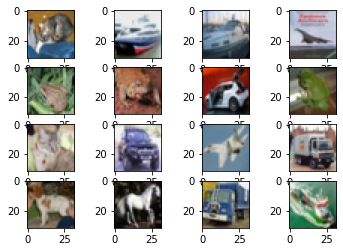

['cat',
 'ship',
 'ship',
 'airplane',
 'frog',
 'frog',
 'truck',
 'frog',
 'cat',
 'automobile',
 'airplane',
 'truck',
 'dog',
 'horse',
 'truck',
 'ship']

In [ ]:
show_imgs(x_test_true[:16])
predicted_class = [labels[x] for x in y_pred1]
predicted_class[:16]

## Model 2: Random Forest Classifier

In [ ]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train, y_train = preprocessing(x_train, y_train)
x_test, y_test = preprocessing(x_test, y_test)

x_train = x_train.reshape(50000, 32*32*3)
x_test = x_test.reshape(10000, 32*32*3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = model2.predict(x_test)

In [ ]:
y_pred2 = np.argmax(y_pred, 1) 
y_test2 = np.argmax(y_test, 1) 

In [ ]:
model_evaluation(y_test2, y_pred2)

[[958   0   0   0   0   0   0   1  40   1]
 [944  49   0   0   0   0   0   1   2   4]
 [979   0  14   0   1   1   5   0   0   0]
 [993   0   1   0   0   5   0   1   0   0]
 [961   0   5   0  29   0   2   2   1   0]
 [947   0   0   0   0  51   2   0   0   0]
 [948   0   1   0   1   0  49   0   1   0]
 [941   0   0   0   2   0   0  54   0   3]
 [745   2   0   0   0   0   0   0 250   3]
 [926   0   0   0   0   0   0   1   2  71]]
Accuracy: 0.1525
Precision: [0.10254763433954185, 0.9607843137254902, 0.6666666666666666, 0.0, 0.8787878787878788, 0.8947368421052632, 0.8448275862068966, 0.9, 0.8445945945945946, 0.8658536585365854]
Recall: [0.958, 0.049, 0.014, 0.0, 0.029, 0.051, 0.049, 0.054, 0.25, 0.071]
F-score: [0.1852639721523883, 0.09324452901998097, 0.027424094025465227, 0.0, 0.05614714424007745, 0.09649952696310311, 0.09262759924385633, 0.10188679245283018, 0.3858024691358024, 0.13123844731977818]
Support: [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 3: Decision Tree Classifier

In [ ]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train, y_train = preprocessing(x_train, y_train)
x_test, y_test = preprocessing(x_test, y_test)

x_train = x_train.reshape(50000, 32*32*3)
x_test = x_test.reshape(10000, 32*32*3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = model3.predict(x_test)

In [ ]:
y_pred3 = np.argmax(y_pred, 1) 
y_test3 = np.argmax(y_test, 1) 

In [ ]:
model_evaluation(y_test3, y_pred3)

[[340  74  79  55  68  62  40  58 151  73]
 [ 69 278  67  75  67  56  59  65  98 166]
 [100  54 211 103 149 107  98  85  42  51]
 [ 66  71 113 178 107 124 129 104  44  64]
 [ 68  39 153  86 235 105 124 105  38  47]
 [ 62  54 110 134  94 221 104  93  67  61]
 [ 45  52 113 130 126 110 280  67  26  51]
 [ 83  74  98  88  98 103  61 257  57  81]
 [156  90  53  47  52  49  41  34 379  99]
 [ 89 175  62  74  42  53  56  72  95 282]]
Accuracy: 0.2661
Precision: [0.31539888682745826, 0.2892819979188345, 0.19924457034938622, 0.18350515463917524, 0.22639691714836224, 0.22323232323232323, 0.28225806451612906, 0.2734042553191489, 0.3801404212637914, 0.28923076923076924]
Recall: [0.34, 0.278, 0.211, 0.178, 0.235, 0.221, 0.28, 0.257, 0.379, 0.282]
F-score: [0.3272377285851781, 0.2835288118306986, 0.2049538610976202, 0.18071065989847715, 0.23061825318940138, 0.2221105527638191, 0.2811244979919679, 0.2649484536082474, 0.3795693540310466, 0.28556962025316457]
Support: [1000, 1000, 1000, 1000, 1000, 100